<a href="https://colab.research.google.com/github/datascientist-ld1981/ComparativeStudy_Numpy_Tensor_DL/blob/main/Numpy_to_Tensors_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NumPy to Tensors: A Comparative Analysis of Neural Networks and CNNs for Image Classification**

---

⏰ *** Problem Statement: ***

  The primary objective of this study is to investigate the progressive improvements in neural networks by comparing the performance of a Fully Connected Neural Network (FCNN) using NumPy arrays, an Artificial Neural Network (ANN) with additional optimizations, and a Convolutional Neural Network (CNN) leveraging tensors. The analysis examines key advancements such as the use of tensors, optimizers, additional layers, initialization strategies, and training epochs. Through these improvements, accuracy increased significantly from a modest 10% to an impressive 74%.

Model Architecture Summary:
Input Layer: 3072 units
Hidden Layer 1: 128 units
Hidden Layer 2: 64 units
Output Layer: 10 units
Total parameters: 402250
Layer 1 (Input to Hidden 1): 393344 parameters
Layer 2 (Hidden 1 to Hidden 2): 8256 parameters
Layer 3 (Hidden 2 to Output): 650 parameters
Epoch 0, Loss: 2.3723, Accuracy: 11.00%
Epoch 10, Loss: 2.3616, Accuracy: 11.00%
Epoch 20, Loss: 2.3511, Accuracy: 11.00%
Epoch 30, Loss: 2.3407, Accuracy: 10.50%
Epoch 40, Loss: 2.3305, Accuracy: 10.50%
Epoch 50, Loss: 2.3204, Accuracy: 10.50%
Epoch 60, Loss: 2.3104, Accuracy: 9.50%
Epoch 70, Loss: 2.3006, Accuracy: 10.00%
Epoch 80, Loss: 2.2909, Accuracy: 10.00%
Epoch 90, Loss: 2.2813, Accuracy: 10.00%


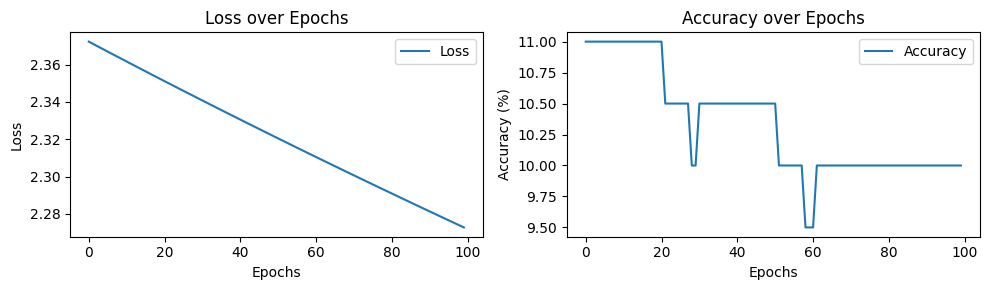

Final Test Accuracy: 10.00%


In [11]:
#Model 1 architecture with FCNN using Numpy not DL model : custom function named as "Ld"

import numpy as np
import matplotlib.pyplot as plt

# ReLU activation and its derivative
def Ld_relu(x):
    return np.maximum(0, x)  # ReLU activation

def Ld_relu_derivative(x):
    return np.where(x > 0, 1, 0)  # Derivative of ReLU

# Softmax activation (for output layer)
def Ld_softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick (subtract max)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)  # Softmax function

# Cross-Entropy loss
def Ld_cross_entropy_loss(predictions, labels):
    m = len(labels)
    # For multi-class classification, cross-entropy loss
    return -np.mean(np.log(predictions[np.arange(m), labels]))

# Train-Test Split
def Ld_train_test_split(X, y, test_size=0.2):
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    return X[indices[test_size:]], X[indices[:test_size]], y[indices[test_size:]], y[indices[:test_size]]

# Forward propagation for the updated model with two hidden layers
def Ld_forward(X, weights1, bias1, weights2, bias2, weights3, bias3):
    a1 = Ld_relu(np.dot(X, weights1) + bias1)  # First hidden layer
    a2 = Ld_relu(np.dot(a1, weights2) + bias2)  # Second hidden layer
    a3 = Ld_softmax(np.dot(a2, weights3) + bias3)  # Output layer
    return a1, a2, a3

# Backward propagation for the updated model with two hidden layers
def Ld_backward(X, y, a1, a2, a3, weights2, weights3):
    m = X.shape[0]

    d_z3 = a3
    d_z3[np.arange(m), y] -= 1  # Gradient for softmax layer
    d_z3 /= m

    d_weights3 = np.dot(a2.T, d_z3)
    d_bias3 = np.sum(d_z3, axis=0, keepdims=True)

    d_a2 = np.dot(d_z3, weights3.T)
    d_z2 = d_a2 * Ld_relu_derivative(a2)

    d_weights2 = np.dot(a1.T, d_z2)
    d_bias2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, weights2.T)
    d_z1 = d_a1 * Ld_relu_derivative(a1)

    d_weights1 = np.dot(X.T, d_z1)
    d_bias1 = np.sum(d_z1, axis=0, keepdims=True)

    return d_weights1, d_bias1, d_weights2, d_bias2, d_weights3, d_bias3

# Training the model
def Ld_train(X_train, y_train, X_test, y_test, input_size, hidden_size1, hidden_size2, output_size, epochs=100, lr=0.01):
    # Initialize weights with Xavier initialization
    weights1 = np.random.randn(input_size, hidden_size1) * np.sqrt(1. / input_size)
    bias1 = np.zeros((1, hidden_size1))

    weights2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(1. / hidden_size1)
    bias2 = np.zeros((1, hidden_size2))

    weights3 = np.random.randn(hidden_size2, output_size) * np.sqrt(1. / hidden_size2)
    bias3 = np.zeros((1, output_size))

    # Lists to store the loss and accuracy for plotting
    loss_history = []
    accuracy_history = []

    # Train the model for a number of epochs
    for epoch in range(epochs):
        a1, a2, a3 = Ld_forward(X_train, weights1, bias1, weights2, bias2, weights3, bias3)
        loss = Ld_cross_entropy_loss(a3, y_train)
        d_weights1, d_bias1, d_weights2, d_bias2, d_weights3, d_bias3 = Ld_backward(X_train, y_train, a1, a2, a3, weights2, weights3)

        # Update weights and biases using gradient descent
        weights1 -= lr * d_weights1
        bias1 -= lr * d_bias1
        weights2 -= lr * d_weights2
        bias2 -= lr * d_bias2
        weights3 -= lr * d_weights3
        bias3 -= lr * d_bias3

        # Track loss and accuracy for each epoch
        loss_history.append(loss)
        accuracy = Ld_compute_accuracy(X_test, y_test, weights1, bias1, weights2, bias2, weights3, bias3)
        accuracy_history.append(accuracy)

        # Print the loss and accuracy at each epoch
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

    return weights1, bias1, weights2, bias2, weights3, bias3, loss_history, accuracy_history

# Accuracy function
def Ld_compute_accuracy(X_test, y_test, weights1, bias1, weights2, bias2, weights3, bias3):
    _, _, a3 = Ld_forward(X_test, weights1, bias1, weights2, bias2, weights3, bias3)
    predictions = np.argmax(a3, axis=1)
    accuracy = np.mean(predictions == y_test) * 100
    return accuracy

# LdModel summary function
def LdModel_summary(input_size, hidden_size1, hidden_size2, output_size):
    print(f"Model Architecture Summary:")
    print(f"Input Layer: {input_size} units")
    print(f"Hidden Layer 1: {hidden_size1} units")
    print(f"Hidden Layer 2: {hidden_size2} units")
    print(f"Output Layer: {output_size} units")

    # Number of parameters for each layer
    params_layer1 = input_size * hidden_size1 + hidden_size1  # Weights + biases
    params_layer2 = hidden_size1 * hidden_size2 + hidden_size2  # Weights + biases
    params_layer3 = hidden_size2 * output_size + output_size  # Weights + biases

    total_params = params_layer1 + params_layer2 + params_layer3

    print(f"Total parameters: {total_params}")
    print(f"Layer 1 (Input to Hidden 1): {params_layer1} parameters")
    print(f"Layer 2 (Hidden 1 to Hidden 2): {params_layer2} parameters")
    print(f"Layer 3 (Hidden 2 to Output): {params_layer3} parameters")

# Example usage with CIFAR-10 data
input_size = 32 * 32 * 3  # CIFAR-10 image size (32x32x3 channels)
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # CIFAR-10 classes

# Simulated data: 1000 training samples
X = np.random.randn(1000, input_size)
y = np.random.randint(0, output_size, 1000)

X_train, X_test, y_train, y_test = Ld_train_test_split(X, y)

# Print model summary
LdModel_summary(input_size, hidden_size1, hidden_size2, output_size)

# Train the model
weights1, bias1, weights2, bias2, weights3, bias3, loss_history, accuracy_history = Ld_train(X_train, y_train, X_test, y_test, input_size, hidden_size1, hidden_size2, output_size, epochs=100, lr=0.001)

# Plotting Loss and Accuracy
plt.figure(figsize=(10, 3))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label="Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()

# Final Test Accuracy
final_accuracy = accuracy_history[-1]
print(f"Final Test Accuracy: {final_accuracy:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.2017 - loss: 2.1722 - val_accuracy: 0.3151 - val_loss: 1.9082
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.3067 - loss: 1.8981 - val_accuracy: 0.3733 - val_loss: 1.7524
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.3431 - loss: 1.8177 - val_accuracy: 0.3770 - val_loss: 1.7084
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.3597 - loss: 1.7635 - val_accuracy: 0.4093 - val_loss: 1.6639
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.3684 - loss: 1.7442 - val_accuracy: 0.4162 - val_loss: 1.6612
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.3873 - loss: 1.7124 - val_accuracy: 0.4293 - val_loss: 1.5975
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.3980 - loss: 1.6764 - val_accuracy: 0.4096 - val_loss: 1.6328
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.4053 - loss: 1.6572 - 

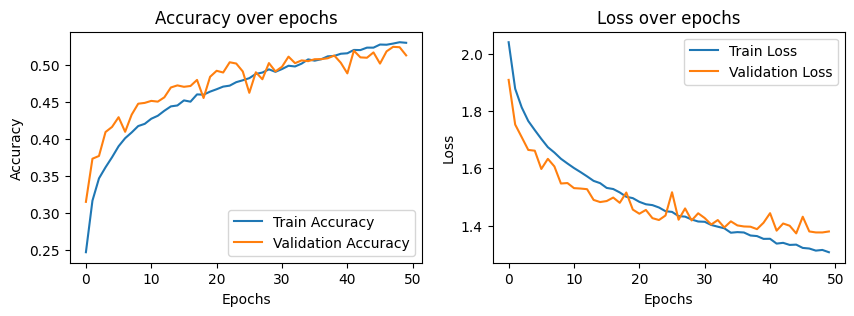

313/313 - 1s - 4ms/step - accuracy: 0.5167 - loss: 1.3728
Test accuracy: 51.67%


In [3]:
#Model 2: Improved FCNN - Numpy with Tensors
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
def build_model(input_shape=(32, 32, 3), dropout_rate=0.2):
    model = Sequential()

    # Flatten input image to vector
    model.add(Flatten(input_shape=input_shape))

    # Hidden Layer 1 with Dropout and LeakyReLU activation
    model.add(Dense(512))
    model.add(Dropout(dropout_rate))
    model.add(LeakyReLU(alpha=0.1))

    # Hidden Layer 2 with Dropout and ReLU activation
    model.add(Dense(256))
    model.add(Dropout(dropout_rate))
    model.add(ReLU())

    # Hidden Layer 3 with Dropout
    model.add(Dense(128))
    model.add(Dropout(dropout_rate))
    model.add(ReLU())

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build and summarize the model
model = build_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64,
                    callbacks=[early_stopping], verbose=1)

# Plot accuracy and loss
plt.figure(figsize=(10, 3))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


In [4]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,216,672 (19.90 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,477,782 (13.27 MB)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,322 (1.39 MB)

 Trainable params: 364,874 (1.39 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 198ms/step - accuracy: 0.3348 - loss: 1.9081 - val_accuracy: 0.4437 - val_loss: 1.6415
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 202ms/step - accuracy: 0.5672 - loss: 1.2403 - val_accuracy: 0.5347 - val_loss: 1.3784
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 197ms/step - accuracy: 0.6606 - loss: 1.0068 - val_accuracy: 0.6712 - val_loss: 0.9636
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 197ms/step - accuracy: 0.7064 - loss: 0.8642 - val_accuracy: 0.6980 - val_loss: 0.8910
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 152s 194ms/step - accuracy: 0.7492 - loss: 0.7544 - val_accuracy: 0.6013 - val_loss: 1.2402
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 191ms/step - accuracy: 0.7669 - loss: 0.6902 - val_accuracy: 0.6328 - val_loss: 1.3194
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 194ms/step - accuracy: 0.7902 - loss: 0.6263 - val_accuracy: 0.7518 - val_loss: 0.7385
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 153s 196ms/step - accuracy: 0.8069 -

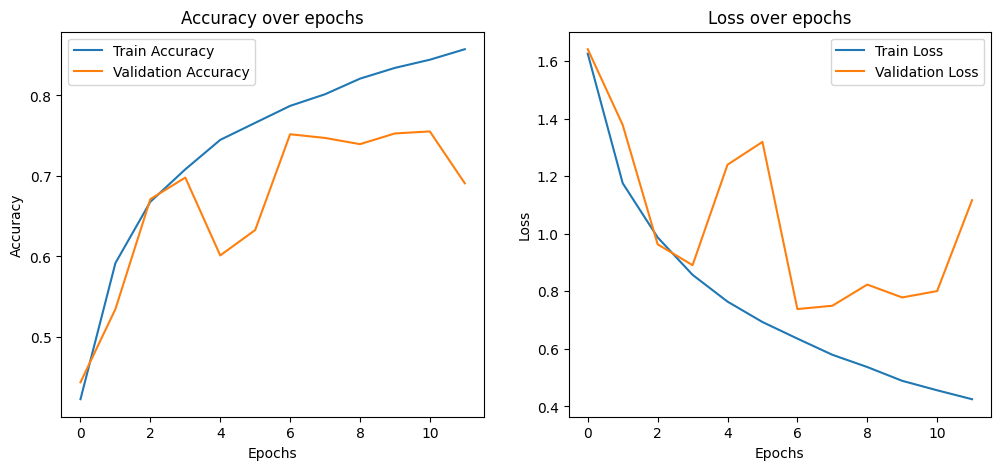

313/313 - 8s - 24ms/step - accuracy: 0.7518 - loss: 0.7385
Test accuracy: 75.18%


In [13]:
#Model 3: Convolutional Neural Network (CNN)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocessing the data
# Normalize the data to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
def build_cnn_model(input_shape=(32, 32, 3), dropout_rate=0.3):
    cnn_model = Sequential()

    # Convolutional Layer 1
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten Layer
    cnn_model.add(Flatten())

    # Fully Connected Layer 1
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(dropout_rate))

    # Fully Connected Layer 2
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dropout(dropout_rate))

    # Output Layer
    cnn_model.add(Dense(10, activation='softmax'))

    # Compile the model
    cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn_model

# Build and summarize the model
cnn_model = build_cnn_model()
cnn_model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the CNN model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")
